# Protein repeat design
In this document we test additional features of the RepeatDesigner package beyond running an optimization of the protein sequence. Here we explore the presence of repeats, how these are encoded in the package, and how we give weights inside a composite scoring function.

In [7]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from repeatdesigner import designer as rd

In [23]:
targets = [25, 26, 28, 29, 32, 33, 34, 42, 44, 45, 48, 49, 52, 53, 55, 56]
repeats = [(2,34), \
           (36,68), \
          (70,102)]
for r in repeats:
    print r[0],r[1]
tpr_des = rd.Repeat(pdb="pdbs/3atb.pdb", targets=targets, repeats=repeats)

2 34
36 68
70 102
 Generated new protein design 
 .. name : pdbs/3atb
 .. file : pdbs/3atb.pdb
 .. sequence : NSAEAWYNLGNAYYKQGDYDEAIEYYQKALELDPNNAEAWYNLGNAYYKQGDYDEAIEYYQKALELDPNNAEAWYNLGNAYYKQGDYDEAIEYYQKALELDPNNAEAKQDLGNAKQKQG
 .. target residues :  [25, 26, 28, 29, 32, 33, 34, 42, 44, 45, 48, 49, 52, 53, 55, 56]


In [25]:
reps = []
for r in repeats:
    reps.append(type(tpr_des.seq[r[0]:r[-1]]))
try:
    assert reps[0] == reps[1]
except AssertionError:
    print "AssertionError: sequences are not equal"

In [42]:
mc_tpr = rd.Optimizer(tpr_des, beta=0.01, len_mc=10, nruns=1)

In [44]:
mc_tpr.run_mc()

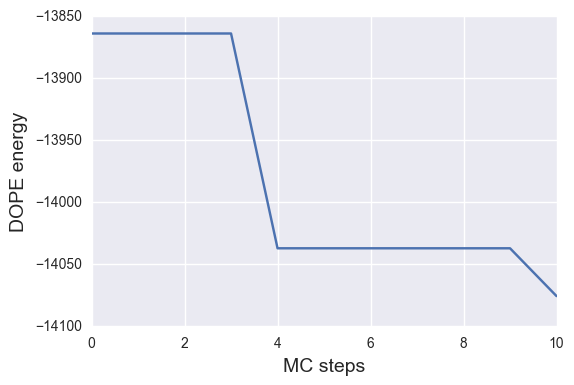

In [45]:
fig, ax = plt.subplots()
for k,v in mc_tpr.models.iteritems():
    ax.plot(v['score'])

ax.set_ylabel('DOPE energy', fontsize=14)
ax.set_xlabel('MC steps', fontsize=14)